In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

from tabulate import tabulate
from scipy.stats import beta

In [6]:
def cusum(data, h:int=5, target: int=None, std:int=None):
    
    period=np.reshape(np.arange(data.shape[0])+1, (data.shape[0],1))
    data=np.reshape(np.array(data),(data.shape[0],1))
    
    if target is None:
        target=np.mean(data)
        
    if std is None:
        rbar=[]
        for i in range(data.shape[0]-1):
            rbar.append(abs(data[i]-data[i+1]))
            
        std=np.mean(rbar)/d2[2]
        
    K=std/2
    H=std*h
    LCL=-H
    UCL=H
    center=0
    
    #numpy array
    c_plus=np.zeros((data.shape[0],1)) #upper CUSUM statistics
    c_minus=np.zeros((data.shape[0],1))
    count_p=np.zeros((data.shape[0],1))
    count_m=np.zeros((data.shape[0],1))
    
    
    
    for i in range(data.shape[0]-1):
        c_plus[(i+1)]=max(0,(data[i+1]-(target+K)+c_plus[i]))
        c_minus[(i+1)]=min(0,(data[i+1]-(target-K)+c_minus[i]))
        
        if c_plus[i+1]>0:
            count_p[i+1]=count_p[i]+1
            
        else:
            count_p[i+1]
            
        if c_minus[i+1]<0:
            count_m[i+1]=count_m[i]+1
            
        else:
            count_m[i+1]=0
        
   
    
    CUSUM=np.hstack((period,data,c_plus, count_p, c_minus, count_m))
    print(tabulate(CUSUM, headers=['Period','Input','C_Plus','N_Plus','C_Minus','N_Minus']))
    print(f'K={K} & H={H}')
    
    return c_plus, c_minus, LCL, UCL, center, count_p, count_m

In [ ]:
# Example Data 생성

ex_data1=pd.DataFrame({'x1':[6,10,7,8,9,12,16,7,9,15,8,20,16,22,11,15,9,15,8,13],
                      'x2':[9,4,8,9,10,11,10,5,7,16,12,21,9,21,7,10,8,7,6,14],
                      'x3':[10,6,10,6,7,10,8,10,8,10,14,19,13,19,10,11,12,10,9,11],
                      'x4':[15,11,5,13,13,10,9,4,12,13,16,22,15,25,16,14,10,11,12,15]}
                      )
                     
d2=[0,0,1.128,1.693,2.059,2.326,2.534,2.704,2.847,2.970,3.078]

In [6]:
c_plus,c_minus,LCL,UCL,center,count_p,count_m=cusum(ex_data1['x1'], target=10, std=1)

  Period    Input    C_Plus    N_Plus    C_Minus    N_Minus
--------  -------  --------  --------  ---------  ---------
       1        6       0           0        0            0
       2       10       0           0        0            0
       3        7       0           0       -2.5          1
       4        8       0           0       -4            2
       5        9       0           0       -4.5          3
       6       12       1.5         1       -2            4
       7       16       7           2        0            0
       8        7       3.5         3       -2.5          1
       9        9       2           4       -3            2
      10       15       6.5         5        0            0
      11        8       4           6       -1.5          1
      12       20      13.5         7        0            0
      13       16      19           8        0            0
      14       22      30.5         9        0            0
      15       11      31          10   

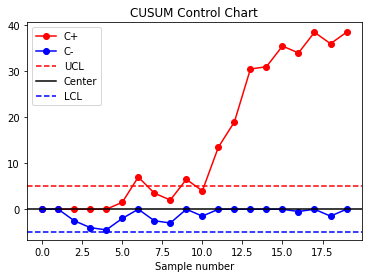

In [7]:
plt.plot(c_plus, marker='o',color='r', label='C+')
plt.plot(c_minus, marker='o', color='b', label='C-')
plt.axhline(UCL, color='r', label='UCL', linestyle='--')
plt.axhline(center,color='black',label='Center')
plt.axhline(LCL, color='b', label='LCL', linestyle='--')
plt.legend()
plt.title('CUSUM Control Chart')
plt.xlabel('Sample number')
plt.show()

In [11]:
import numpy as np
xgen = np.random.normal(loc=0.8, scale = 1.0, size=100)

c_plus,c_minus,LCL,UCL,center,count_p,count_m=cusum(xgen, target=0, std=1)



  Period        Input     C_Plus    N_Plus    C_Minus    N_Minus
--------  -----------  ---------  --------  ---------  ---------
       1  -0.182895     0                0   0                 0
       2  -0.617476     0                0  -0.117476          1
       3   0.339248     0                0   0                 0
       4   1.22427      0.724272         1   0                 0
       5   0.149302     0.373574         2   0                 0
       6   1.42266      1.29624          3   0                 0
       7   1.01882      1.81506          4   0                 0
       8   0.938903     2.25396          5   0                 0
       9   1.21517      2.96913          6   0                 0
      10  -0.0800274    2.38911          7   0                 0
      11  -0.234736     1.65437          8   0                 0
      12  -2.44298      0                0  -1.94298           1
      13   1.99418      1.49418          1   0                 0
      14   0.383334     1

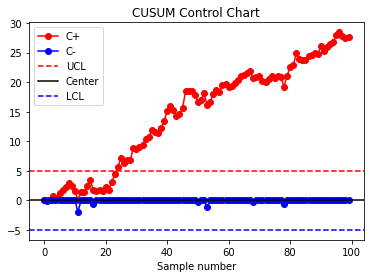

In [12]:
plt.plot(c_plus, marker='o',color='r', label='C+')
plt.plot(c_minus, marker='o', color='b', label='C-')
plt.axhline(UCL, color='r', label='UCL', linestyle='--')
plt.axhline(center,color='black',label='Center')
plt.axhline(LCL, color='b', label='LCL', linestyle='--')
plt.legend()
plt.title('CUSUM Control Chart')
plt.xlabel('Sample number')
plt.show()

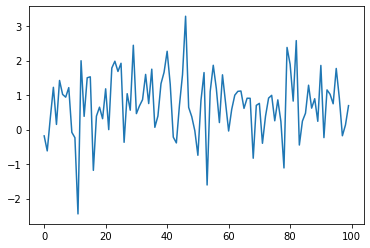

In [13]:
plt.plot(xgen)
plt.show()